In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic


C:\Users\Subodh\AppData\Local\Temp\ipykernel_12452\943163841.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


**Exploring Data** 

In [2]:
# Reading a data 
df=pd.read_csv('mcdonalds.csv')

In [3]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
df.shape

(1453, 15)

In [5]:
# Checking NUll Values
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [6]:
df['VisitFrequency'].unique()


array(['Every three months', 'Once a week', 'Once a month', 'Once a year',
       'More than once a week', 'Never'], dtype=object)

In [7]:
# Converting 'VisitFrequency' to numeric values
visit_frequency_mapping = {
   'Every three months': 0,
    'Once a week': 1,
    'Once a month': 2,
    'Once a year': 3,
    'More than once a week': 4,
    'Never': 5  
}

df['VisitFrequency_numeric'] = df['VisitFrequency'].map(visit_frequency_mapping)

In [8]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,VisitFrequency_numeric
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female,0
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female,0
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female,0
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female,1
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male,2


In [9]:
# Extracting first eleven columns from the data 
mcdonalds_array = np.array(df)
MD_x = mcdonalds_array[:, :11]
print(MD_x)



[['No' 'Yes' 'No' ... 'Yes' 'No' 'No']
 ['Yes' 'Yes' 'No' ... 'Yes' 'No' 'No']
 ['No' 'Yes' 'Yes' ... 'Yes' 'Yes' 'No']
 ...
 ['Yes' 'Yes' 'No' ... 'Yes' 'No' 'No']
 ['Yes' 'Yes' 'No' ... 'No' 'Yes' 'No']
 ['No' 'Yes' 'No' ... 'Yes' 'No' 'Yes']]


In [10]:
# Converting 'Yes' to 1 and 'No' to 0
MD_x = (MD_x == "Yes").astype(int)
column_means = np.round(np.mean(MD_x, axis=0), 2)
print(column_means)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [11]:
# Using PCA
MD_pca = PCA()
MD_pca.fit(MD_x)

# Summary
print("Standard deviations:")
print(MD_pca.explained_variance_)
print("\nProportion of Variance Explained:")
print(MD_pca.explained_variance_ratio_)
print("\nCumulative Proportion of Variance Explained:")
print(np.cumsum(MD_pca.explained_variance_ratio_))

Standard deviations:
[0.57312398 0.36900226 0.2546408  0.15904032 0.11384214 0.09627033
 0.08392454 0.07569209 0.07035814 0.06192225 0.05612296]

Proportion of Variance Explained:
[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]

Cumulative Proportion of Variance Explained:
[0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


In [12]:
# Factor Loading
print("Standard deviations (Eigenvalues):")
print(np.round(MD_pca.explained_variance_, 1))
print("\nProportion of Variance Explained:")
print(np.round(MD_pca.explained_variance_ratio_, 1))
print("\nCumulative Proportion of Variance Explained:")
print(np.round(np.cumsum(MD_pca.explained_variance_ratio_), 1))

Standard deviations (Eigenvalues):
[0.6 0.4 0.3 0.2 0.1 0.1 0.1 0.1 0.1 0.1 0.1]

Proportion of Variance Explained:
[0.3 0.2 0.1 0.1 0.1 0.1 0.  0.  0.  0.  0. ]

Cumulative Proportion of Variance Explained:
[0.3 0.5 0.6 0.7 0.8 0.8 0.9 0.9 0.9 1.  1. ]


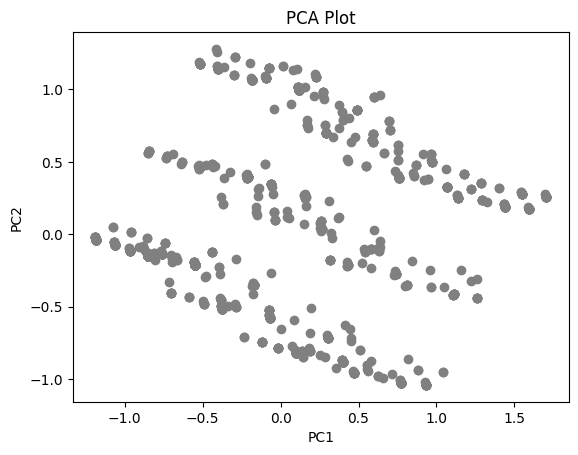

Projected Axes (Principal Components):
[[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633]
 [-0.30444402 -0.0625153  -0.03701866 -0.32235949 -0.80237317 -0.06464172
  -0.14931026 -0.28726479  0.02439661  0.19205128 -0.08857138]
 [ 0.0551622  -0.14242496  0.19761927 -0.35413876  0.2539601  -0.09736269
   0.11895823 -0.00254696  0.06781599  0.76348804  0.36953871]
 [-0.30753507  0.27760805  0.07062017 -0.07340475  0.36139895  0.10793025
  -0.12897259 -0.21089912 -0.00312457  0.28784553 -0.72920859]
 [ 0.17073819 -0.34783006 -0.3550866  -0.40651542  0.20934711 -0.59463206
  -0.10324067 -0.07691443 -0.26134151 -0.17822612 -0.21087805]
 [-0.28051863 -0.05973793  0.70763705 -0.38594277  0.03616962 -0.08684577
  -0.04044934  0.36045348 -0.06838452 -0.34961569 -0.02679159]
 [ 

In [13]:
# rotating and project consumers (in grey) into the first two principal components, ploting

pca_result = MD_pca.transform(MD_x)
# Plotting PCA 
plt.scatter(pca_result[:, 0], pca_result[:, 1], color='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot')
plt.show()

# Projected axes
proj_axes = MD_pca.components_
print("Projected Axes (Principal Components):")
print(proj_axes)

**Extracting Segments**

`Using K-Means`

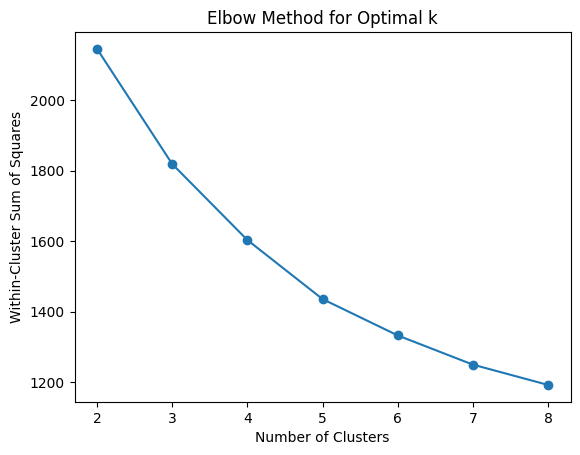

In [14]:
np.random.seed(1234)
# Performing KMeans Clustering and storing sum of squares(inertias)
inertias = []
for n_clusters in range(2, 9):
    clusterer = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    cluster_labels = clusterer.fit_predict(MD_x)
    inertias.append(clusterer.inertia_)

# Plotting sum of squares against the number of clusters 
plt.plot(range(2, 9), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.title('Elbow Method for Optimal k')
plt.show()

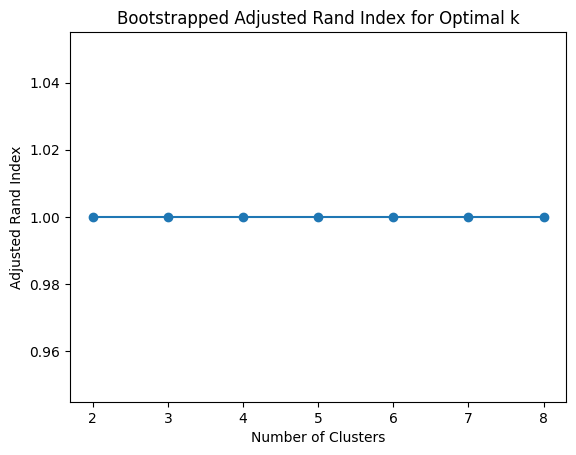

In [15]:
np.random.seed(1234)

# KMeans clustering with bootstrapping
def boot_kmeans(X, n_clusters, n_rep=10, n_boot=100):
    scores = []
    for _ in range(n_boot):
        X_boot = resample(X, replace=True, n_samples=len(X))
        clusterer = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
        cluster_labels = clusterer.fit_predict(X_boot)
        score = adjusted_rand_score(labels_true=cluster_labels, labels_pred=clusterer.labels_)
        scores.append(score)
    return np.mean(scores)

# Performing bootstrapping and computing adjusted Rand index
adjusted_rand_indices = []
for n_clusters in range(2, 9):
    ari = boot_kmeans(MD_x, n_clusters=n_clusters)
    adjusted_rand_indices.append(ari)

# Plotting
plt.plot(range(2, 9), adjusted_rand_indices, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Adjusted Rand Index')
plt.title('Bootstrapped Adjusted Rand Index for Optimal k')
plt.show()

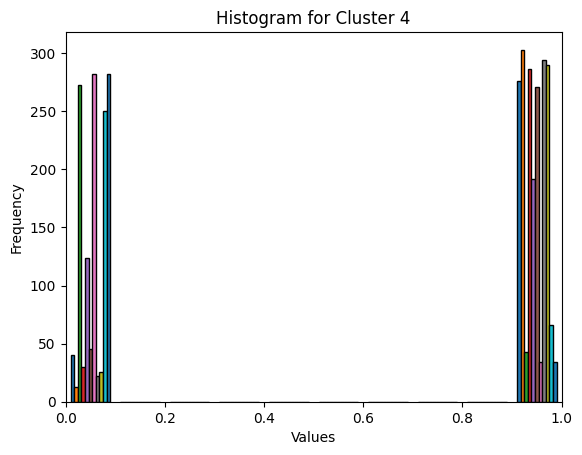

In [16]:
# Histogram Plotting for Cluster 4
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234) 
MD_kmeans_labels = kmeans.fit_predict(MD_x)

# Extracting Cluster 4
cluster_4_data = MD_x[MD_kmeans_labels == 3] 

# Plotting
plt.hist(cluster_4_data, bins=np.arange(0, 1.1, 0.1), edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram for Cluster 4')
plt.xlim(0, 1)
plt.show()

`Using Mixtures of Distribution`

In [17]:
np.random.seed(1234)

# Performing mixture modeling
models = {}
for n_components in range(2, 9):
    gmm = GaussianMixture(n_components=n_components, n_init=10, random_state=1234)
    gmm.fit(MD_x)
    models[n_components] = gmm
    
# Printing results
for n_components, model in models.items():
    print(f"Number of components: {n_components}")
    print("Weights:")
    print(model.weights_)
    print("Means:")
    print(model.means_)
    print("Covariances:")
    print(model.covariances_)
    print("\n")

Number of components: 2
Weights:
[0.67790778 0.32209222]
Means:
[[0.6822335  1.         0.09238579 0.84974619 0.43350254 1.
  0.66598985 0.77664975 0.27817259 0.24263959 0.        ]
 [0.27991453 0.71367521 0.09615385 0.90384615 0.72222222 0.69017094
  0.45726496 0.36538462 0.52564103 0.10683761 0.7542735 ]]
Covariances:
[[[ 2.16791951e-01  1.36613090e-29 -6.17588704e-03 -8.15171739e-03
   -8.44031024e-03  1.36613090e-29  3.50743384e-03  1.18874488e-01
    8.19088355e-03  3.54783684e-02  0.00000000e+00]
  [ 1.37670243e-29  1.00000000e-06  1.78755080e-30  1.73893775e-29
    8.38154701e-30  1.97215226e-29  1.39031729e-29  1.52738187e-29
    5.60183844e-30  4.76359864e-30  0.00000000e+00]
  [-6.17588704e-03  1.78434731e-30  8.38516532e-02 -7.43848077e-03
    7.66626298e-03  1.78434731e-30  4.00937925e-04  4.39073411e-03
    6.78811616e-03  8.04040300e-03  0.00000000e+00]
  [-8.15171739e-03  1.73949836e-29 -7.43848077e-03  1.27678601e-01
    5.09222088e-02  1.73949836e-29 -7.54670309e-03 -8

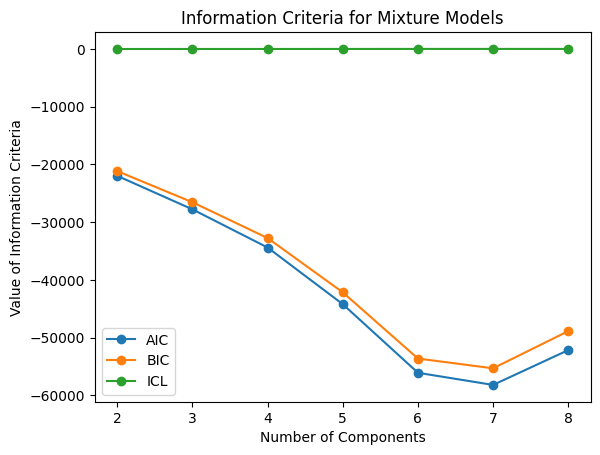

In [18]:
np.random.seed(1234)

# Initialize lists to store AIC, BIC, and ICL values
aic_values = []
bic_values = []
icl_values = []

# Performing mixture modeling
for n_components in range(2, 9):
    gmm = GaussianMixture(n_components=n_components, n_init=10, random_state=1234)
    gmm.fit(MD_x)
    aic_values.append(gmm.aic(MD_x))
    bic_values.append(gmm.bic(MD_x))
    icl_values.append(gmm.lower_bound_)

# Ploting the information criteria
plt.plot(range(2, 9), aic_values, label='AIC', marker='o')
plt.plot(range(2, 9), bic_values, label='BIC', marker='o')
plt.plot(range(2, 9), icl_values, label='ICL', marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria for Mixture Models')
plt.legend()
plt.show()

In [19]:
# Comparing cluster assignments using a contingency table
MD_kmeans_labels = MD_kmeans_labels 
gmm_4 = GaussianMixture(n_components=4, n_init=10, random_state=1234)
MD_gmm_labels = gmm_4.fit_predict(MD_x)
contingency_table = confusion_matrix(MD_kmeans_labels, MD_gmm_labels)
print("Contingency Table (KMeans vs GMM):")
print(contingency_table)

Contingency Table (KMeans vs GMM):
[[ 31  51 268  14]
 [  4 214   0  22]
 [143   0 362  28]
 [  0   3   0 313]]


In [20]:
# log-likelihood of the fitted mixture models 
gmm_init_means = []
gmm_init_covariances = []
for label in np.unique(MD_kmeans_labels):
    cluster_data = MD_x[MD_kmeans_labels == label]
    cluster_mean = np.mean(cluster_data, axis=0)
    cluster_covariance = np.cov(cluster_data, rowvar=False)
    gmm_init_means.append(cluster_mean)
    gmm_init_covariances.append(cluster_covariance)

gmm = GaussianMixture(n_components=len(np.unique(MD_kmeans_labels)),
                      means_init=gmm_init_means,
                      precisions_init=np.linalg.inv(gmm_init_covariances),
                      random_state=1234)
MD_gmm_labels = gmm.fit_predict(MD_x)

# Computing log-likelihood
log_likelihood = gmm.score(MD_x)
print("Log Likelihood for the Gaussian Mixture Model:", log_likelihood)

Log Likelihood for the Gaussian Mixture Model: 10.919494718679632


` Using Mixtures of Regression Models `

In [21]:
# Reversing table for the 'Like' Variable 
rev_table = df['Like'].value_counts(ascending=True)
print(rev_table)

Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
+1              152
I hate it!-5    152
+4              160
0               169
+2              187
+3              229
Name: count, dtype: int64


In [22]:
# Converting the "Like" column to numeric type
df['Like'] = pd.to_numeric(df['Like'], errors='coerce')

# Creating a new column "Like_n"
df['Like_n'] = 6 - df['Like']

# Counting the values of the "Like_n" variable
like_n_counts = df['Like_n'].value_counts()
print(like_n_counts)

Like_n
3.0     229
4.0     187
6.0     169
2.0     160
5.0     152
9.0      73
10.0     71
8.0      59
7.0      58
Name: count, dtype: int64


In [23]:
# creating a formula string
column_names = "+".join(df.columns[:11])
formula_str = "Like_n ~ " + column_names
formula = smf.ols(formula_str, data=df)
print(formula)

In [24]:
# Flexible Regression Modeling 
from sklearn.impute import SimpleImputer
# Splitting the data 
X = df.drop(columns=['Like_n'])  # Features
y = df['Like_n'] 

# One-hot encoding 
X_encoded = pd.get_dummies(X, drop_first=True)

# Replacing X and y Nan Values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_encoded)
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1)).flatten()

# train, test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=1234)

# Linear Regression Model
model = LinearRegression()

# Feature Selection
feature_selector = SelectFromModel(estimator=model)
feature_selector.fit(X_train, y_train)

# Transforming training and testing data 
X_train_selected = feature_selector.transform(X_train)
X_test_selected = feature_selector.transform(X_test)

# Model Fitting 
model.fit(X_train_selected, y_train)

# Prediction 
y_pred = model.predict(X_test_selected)

# mean squared error computing 
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3.391288633785174e-30


**Profiling Segments**

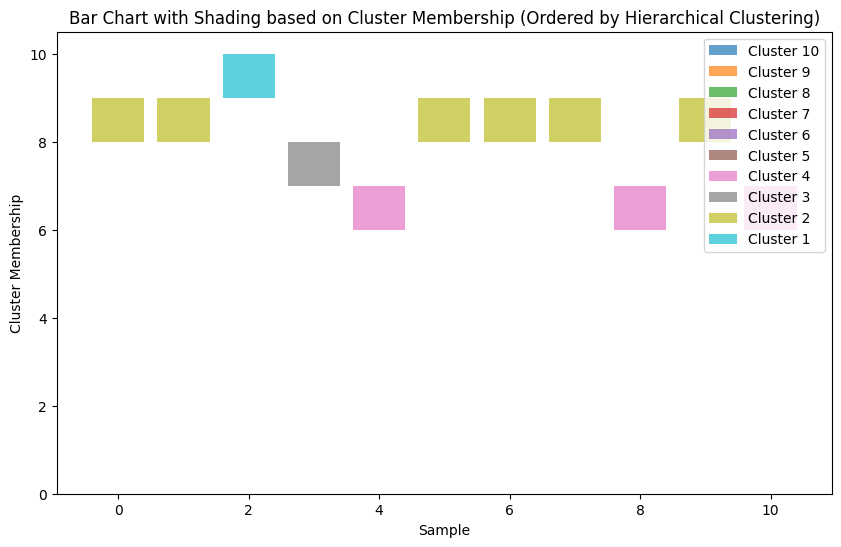

In [25]:
# Standardizing the data 
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)

# Performing hierarchical clustering
MD_vclust = linkage(MD_x_scaled.T, method='complete')

# Performing k-means clusterin
kmeans = KMeans(n_clusters=4, random_state=1234)
MD_k4 = kmeans.fit_predict(MD_x_scaled.T)

# Ordering the clusters
order = np.argsort(MD_vclust[:, 2])[::-1]

# Plotting the bar chart 
plt.figure(figsize=(10, 6))
for i, cluster in enumerate(order):
    plt.bar(range(len(MD_k4)), (MD_k4 == cluster), bottom=i, label=f'Cluster {cluster+1}', color=f'C{i}', alpha=0.7)

plt.xlabel('Sample')
plt.ylabel('Cluster Membership')
plt.title('Bar Chart with Shading based on Cluster Membership (Ordered by Hierarchical Clustering)')
plt.legend()
plt.show()

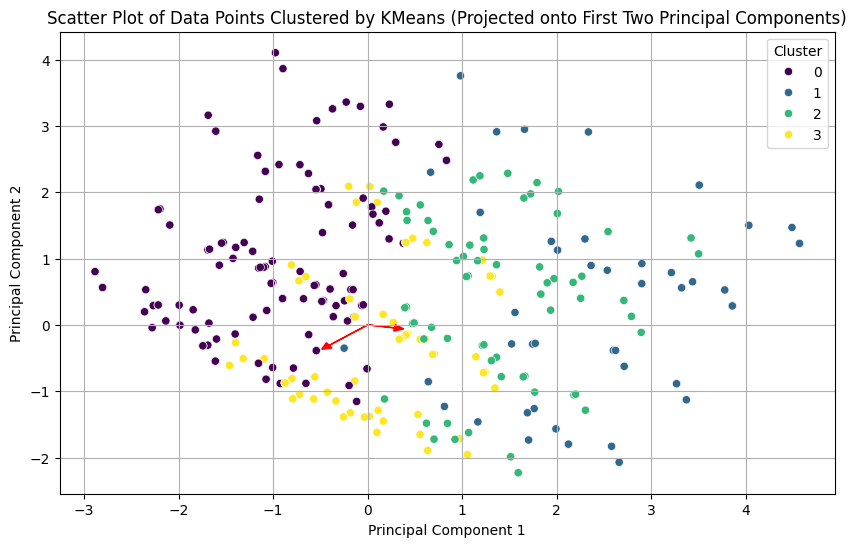

In [26]:
# Scatter Plot of data points clusterd by kmeans 

# Standardizing the data  
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)

# Performing PCA
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x_scaled)

# Performing k-means clustering
kmeans = KMeans(n_clusters=4, random_state=1234)
MD_k4 = kmeans.fit_predict(MD_x_scaled)

# Plotting Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=MD_pca[:, 0], y=MD_pca[:, 1], hue=MD_k4, palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Data Points Clustered by KMeans (Projected onto First Two Principal Components)')
plt.legend(title='Cluster')
plt.grid(True)

# Visualizing Principal axes
for length, vector in zip(pca.explained_variance_, pca.components_):
    plt.arrow(0, 0, vector[0], vector[1], head_width=0.1, head_length=0.1, color='r')

plt.show()

**Describing Segemnts**

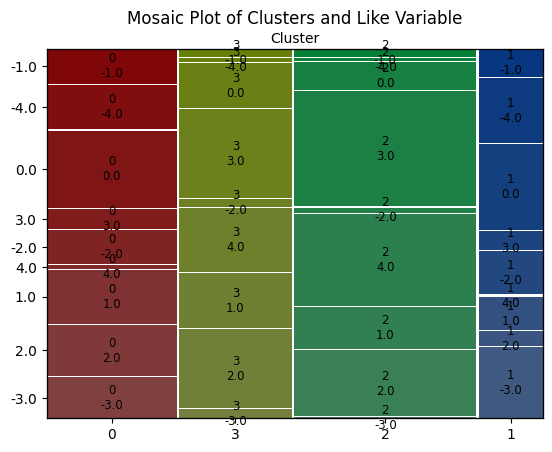

In [27]:
data = pd.DataFrame({'Cluster': MD_kmeans_labels, 'Like': df['Like']})

# Creating mosaic plot
mosaic(data, ['Cluster', 'Like'], title='Mosaic Plot of Clusters and Like Variable')
plt.xlabel('Cluster')
plt.ylabel('Like')
plt.show()

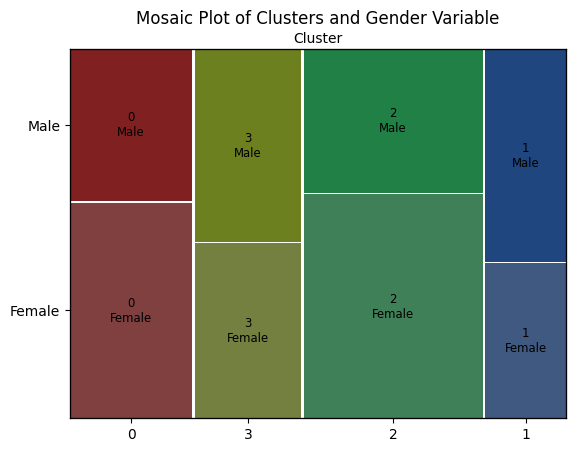

In [28]:
data = pd.DataFrame({'Cluster': MD_kmeans_labels, 'Gender': df['Gender']})

# Creating mosaic plot
mosaic(data, ['Cluster', 'Gender'], title='Mosaic Plot of Clusters and Gender Variable')
plt.xlabel('Cluster')
plt.ylabel('Gender')
plt.show()

**Selecting Target Segments**

In [29]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,VisitFrequency_numeric,Like_n
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3.0,61,Every three months,Female,0,9.0
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2.0,51,Every three months,Female,0,4.0
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1.0,62,Every three months,Female,0,5.0
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4.0,69,Once a week,Female,1,2.0
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2.0,49,Once a month,Male,2,4.0


In [30]:
# Check the counts of non-NaN values in 'VisitFrequency' for each cluster
visit_counts = df.groupby(MD_kmeans_labels)['VisitFrequency_numeric'].count()
print("Counts of non-NaN values for each cluster:")
print(visit_counts)

# Calculate mean visit frequency for each cluster, handling missing values
visit = df.groupby(MD_kmeans_labels)['VisitFrequency_numeric'].mean()
print("\nMean visit frequency for each cluster:")
print(visit)

Counts of non-NaN values for each cluster:
0    364
1    240
2    533
3    316
Name: VisitFrequency_numeric, dtype: int64

Mean visit frequency for each cluster:
0    2.203297
1    2.600000
2    1.527205
3    1.582278
Name: VisitFrequency_numeric, dtype: float64


In [31]:
# Calculating mean value of 'Like_n' for each cluster
like = df.groupby(MD_kmeans_labels)['Like_n'].mean()
print("Mean value of 'Like_n' for each cluster:")
print(like)

Mean value of 'Like_n' for each cluster:
0    6.480519
1    7.298013
2    3.625000
3    4.157303
Name: Like_n, dtype: float64


In [32]:
df['Gender_binary'] = (df['Gender'] == 'Female').astype(int)
# Calculate proportion of females for each cluster
female = df.groupby(MD_kmeans_labels)['Gender_binary'].mean()
print("Proportion of females for each cluster:")
print(female)

Proportion of females for each cluster:
0    0.585165
1    0.420833
2    0.607880
3    0.474684
Name: Gender_binary, dtype: float64
